# Анализ гипотез на примере интернет-магазина


<b>Цель проекта</b>
    
На примере интернет-магазина приоритизировать гипотезы для увеличения выручки, запустить A/B-тест и проанализировать результаты.


**Импорт библиотек**

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import math 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

## 1. Приоритизация гипотез



Необходимо приоритизировать гипотезы.  
    
<b>Требуемые шаги:</b>

<li>применение фреймворка ICE, рассчитывается как отношение impact*confidence/efforts</li>
<li>применение фреймворка RICE, рассчитывается как отношение reach*impact*confidence/efforts</li>

Где:
Reach — скольких пользователей затронет изменение
Impact — насколько сильно изменение повлияет на пользователей
Confidence — уверенность в том, что изменение повлияет на пользователей именно так
Efforts — стоимость гипотезы
    
Параметры фреймворков ICE и RICE оценивается в шкале от 0 до 10.


**Откроем файл и изучим данные**

In [2]:
pd.set_option('max_colwidth', 400)
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
except:
    hypothesis = pd.read_csv('hypothesis.csv')
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


## 1.1 Фреймворк ICE для приоритизации гипотез

In [3]:
hypothesis['ICE'] = hypothesis['Impact']*hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis.loc[:,['Hypothesis', 'ICE']].sort_values(by ='ICE', ascending = False)) 

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Наиболее перспективные гипотезы по ICE:
* Запустить акцию, дающую скидку на товар в день рождения
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок

## 1.2 Фреймворк RICE для приоритизации гипотез

In [4]:
hypothesis['RICE'] = hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'] / hypothesis['Efforts']
display(hypothesis.loc[:,['Hypothesis', 'RICE']].sort_values(by ='RICE', ascending = False)) 

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE:
* Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
* Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
* Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
* Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию

In [5]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.333333,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.000000,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.000000,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.125000,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.000000,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.333333,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.000000,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.200000,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.200000,16.2


## 1.3 Вывод по приоритизации гипотез

Можно заметить, что приоритизация гипотез при применении RICE вместо ICE изменилась. 
* после применения фрейморка RICE с третьего на первое места переметилась гипотеза о добавлении формы подписки на страницы для сбора email. Это можно объяснить тем, что охват пользователей Reach оценен в 10 баллов, что привело к увеличению числителя в формуле расчета RICE. По этой же причине увеличился приоритет гипотезы о добавлении блока рекомендаций, ее пользовательский охват оценен в 8 баллов.
* приоритет гипотезы о добавлении двух новых канало привлечения трафика напротив снизился, за счет небольшого охвата (оценен в 3 балла), однако за счет самого высокого влияния (Impact оценен в 10 баллов) данная гипотеза остается в тройке лидеров.
* приоритет гипотезы о показе на главной странице банера с акциями и распродажами не изменился, охват оценивается на половину пользователей, при этом уверенность в оценках параметров достаточна высока - 8 баллов. 
* гипотеза о скидке в день рождения переместилась на 4 позицию, т.к. хоть влияние на пользователей и уверенность в гипотезе оценены на 9 баллов, показатель охвата оценен в 1 балл, возможно из-за того, что не все пользователи указывают день рождения.
* гипотеза об изменении струткуры категории для увеличения конверсии выросла в приоритете, поскольку хоть трудозатраты и велики (8 баллов Efforts) изменения коснутся болшинства пользователей - Reach оценен в 8 баллов.
* приоритет гипотезы о собственной службе доставки немного понизился, поскольку охват оценен всего в 2 балла, при этом трудозатраты самые высокие - Efforts оценен в 10 баллов, возможно, проще заключить договор со сторонними службами доставки.
* добавление отзывов о магазине и изменение цвета фона главной страницы наименее перспективные гипотезы, трудозатраты по ним небольшие, но охват и влияние также не высоки.  На цвет фона многие не обратят внимание, а отзывы о магазине на сайте магазина могут насторожить клиентов.

## 2. Анализ A/B-теста


 
Необходимо проанализировать результаты полученного А/В теста.
    
<b>Требуемые шаги:</b>

<li>Построить график кумулятивной выручки по группам</li>
<li>Построить график кумулятивного среднего чека по группам</li>
<li>Построить график относительного изменения кумулятивного среднего чека группы B к группе A</b>
<li>Построить график кумулятивной конверсии по группам</li>
<li>Построить график относительного изменения кумулятивной конверсии группы B к группе A</li>
<li>Построить точечный график количества заказов по пользователям</li>
<li>Посчитать 95-й и 99-й перцентили количества заказов на пользователя</li>
<li>Построить точечный график стоимостей заказов</li>
<li>Посчитать 95-й и 99-й перцентили стоимости заказов</li>
<li>Посчитать статистическую значимость различий в конверсии между группами по «сырым» данным</li>
<li>Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным</li>
<li>Посчитать статистическую значимость различий в конверсии между группами по «очищенным» данным</li>
<li>Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным</li>

По результатам тестирования необходимо принять решение об остановке теста, зафиксировав победу одной из групп, или, напротив, отсутствие различий между группами, либо принять решение о продолжении теста.


**Откроем файл и изучим данные:**

In [7]:
try:
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    orders = pd.read_csv('orders.csv')
    visitors = pd.read_csv('visitors.csv')
display(orders.head())
orders.info()
display(visitors.head())
visitors.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
orders['date'].describe()

count           1197
unique            31
top       2019-08-05
freq              48
Name: date, dtype: object

In [9]:
visitors['date'].describe()

count             62
unique            31
top       2019-08-04
freq               2
Name: date, dtype: object

In [10]:
orders.duplicated().sum()

0

In [11]:
visitors.duplicated().sum()

0

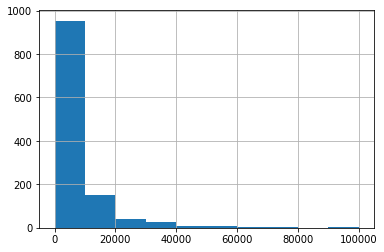

In [12]:
orders['revenue'].hist(range = (0, 100000))

В обоих датасетах представлены данные с 1 по 31 августа 2019 года. Пропуски отсутствуют, дубликатов нет. Выручка в основном в пределах до 100000, но также наблюдаются незначительно количество дорогих заказов - свыше 40000.

**Приведем даты к типу datetime:**

In [13]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

**Определим, есть ли посетители, попавшие в обе группы тестирования**

In [14]:
a_b_visitors = orders.groupby('visitorId')['group'].nunique().reset_index().sort_values(by = 'group', ascending = False)
a_b_visitors

,visitorId,group
639,2654030115,2
932,3891541246,2
950,3941795274,2
340,1404934699,2
84,351125977,2
...,...,...
357,1476256851,1
358,1476741193,1
359,1484903144,1
360,1485964287,1


Уберем визитеров попавших в обе группы:

In [15]:
#определим ID с одной группой
a_b_visitors = a_b_visitors[a_b_visitors['group'] < 2].reset_index()

#срез orders по уникальным ID
unique_visitors = a_b_visitors['visitorId']
orders = orders.query('visitorId in @unique_visitors')
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


**По результатам предобработки можно заключить:**
- данные предоставлены без пропусков
- дубликаты отсутствуют
- данные предоставлены за период с 1 по 31 августа 2019 года
- даты были приведены к типу datetime
- были обнаружены и убраны посетители, попавшие в обе группы тестирования

## 2.1 Кумулятивная выручка по группам

Cоздадим массив уникальных пар значений дат и групп теста из orders:

In [16]:
datesGroups = orders[['date','group']].drop_duplicates() 
datesGroups

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A
...,...,...
1068,2019-08-12,A
1114,2019-08-13,B
1116,2019-08-13,A
1149,2019-08-14,B


Посчитаем кумулятивные данные о заказах:

In [17]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'transactionId' : pd.Series.nunique,
    'visitorId' : pd.Series.nunique,
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
 
ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


Посчитаем кумулятивные данные о визитах:

In [18]:
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
         'date' : 'max', 
         'group' : 'max', 
         'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [19]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


Построим графики кумулятивной выручки по группам A/B:

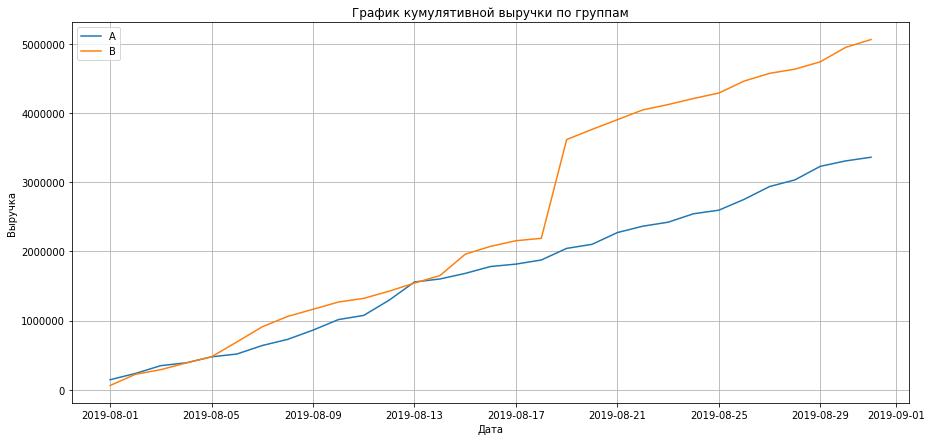

In [20]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]


fig= plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График кумулятивной выручки по группам')
plt.grid()
plt.show()

Выручка группы А равномерно увеличивается в течение всего теста. Выручка группы В также растет, но наблюдается резкое увеличение значения выручки 19 августа. Возможно, в этот день было совершено несколько дорогих покупок, либо резко увеличилось число заказов.

## 2.2 Кумулятивный средний чек по группам

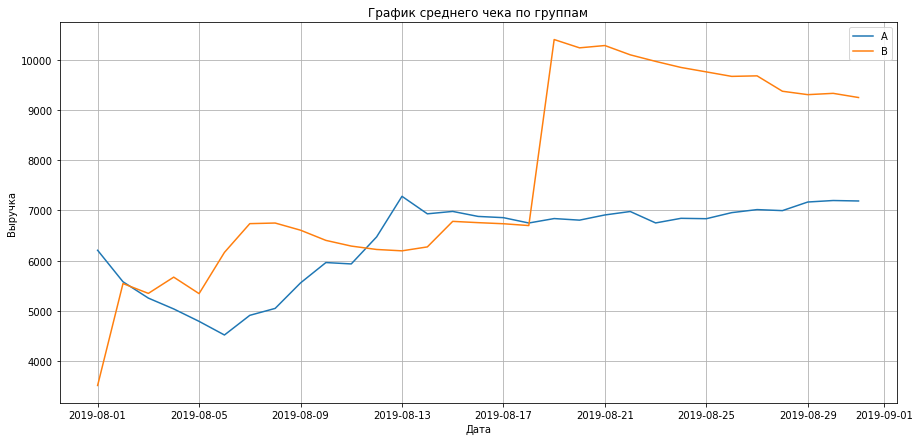

In [21]:
fig= plt.figure(figsize=(15,7))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.title('График среднего чека по группам')
plt.grid()
plt.show()

Кумулятивное значение среднего чека серьезно колеблется по обеим группам.  Возможно, имеют место выбросы, которые искажают результат.

## 2.3 Изменения кумулятивного среднего чека группы B к группе A

Объединим данные групп А и В:

In [22]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])



Построим график отностельного различия:

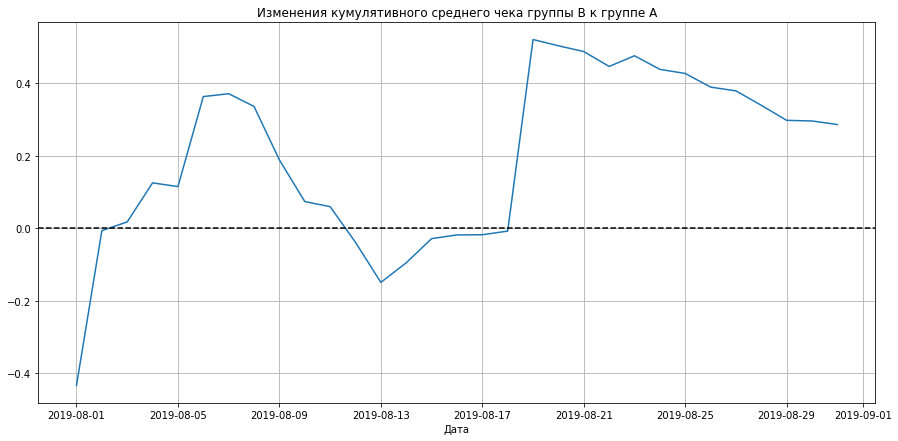

In [23]:
fig= plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeRevenue['date'], 
         (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.xlabel('Дата')
plt.title('Изменения кумулятивного среднего чека группы B к группе A')
plt.grid()
plt.show()

Относительное различие в средних чеках между группами резко изменяется в некоторые даты. Помимо уже ранее отмеченного 19 августа, можно увидеть скачкообразное изменение 2, 6, 10 августа, и в период с 13 по 15 августа.

## 2.4  Кумулятивная конверсия по группам

Добавим столбец c отношением числа заказов к количеству пользователей в указанной группе:

In [24]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,23,19,142779,719,0.031989
1,2019-08-01,B,17,17,59758,713,0.023843
2,2019-08-02,A,42,36,234381,1338,0.031390
3,2019-08-02,B,40,39,221801,1294,0.030912
4,2019-08-03,A,66,60,346854,1845,0.035772


Определим конверсию отдельно по группам и построим график:

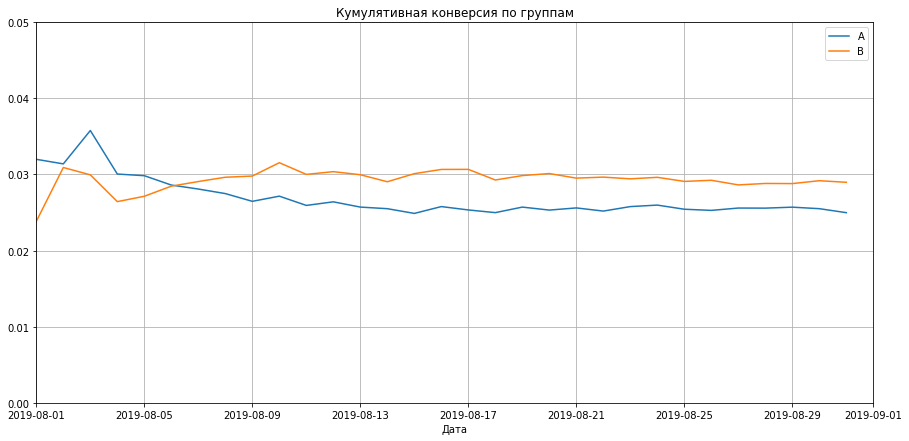

In [25]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']


fig= plt.figure(figsize=(15,7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.axis(['2019-08-01', '2019-09-01', 0, 0.05])
plt.xlabel('Дата')
plt.title('Кумулятивная конверсия по группам')
plt.legend()
plt.grid()
plt.show()

Можно отметить, что конверсия группы B изначально несколько меньше конверсии группы A, но после 6 августа конверсия группы B увеличилась, и далее выровнялась около одного значения. Конверсия группы A несколько просела, но также зафиксировалась.

## 2.5 Относительное изменение кумулятивной конверсии группы B к группе A

Построим график относительного различия кумулятивных конверсий:

No handles with labels found to put in legend.


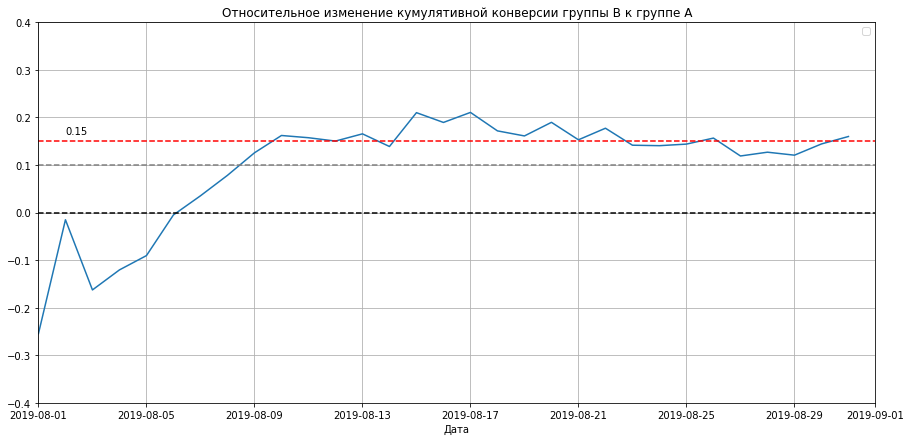

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig= plt.figure(figsize=(15,7))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.axis(['2019-08-01', '2019-09-01', -0.4, 0.4]) 
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
line = (mergedCumulativeConversions.query('date > "2019-08-17"')['conversionB']/mergedCumulativeConversions.query('date > "2019-08-17"')['conversionA']-1).mean()
plt.axhline(y = line, color='red', linestyle='--')
plt.legend()
plt.grid()
plt.text('2019-08-02', (line + line/10), round(line, 2),)
plt.show()

Конверсия группы B после изначального колебания зафиксироваласт около прироста в 10% относительно группы А.

## 2.6 Анализ количества заказов по пользователям

Создадим датафрейм с данными о количестве заказов по пользователям:

In [27]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique}).sort_values(by='transactionId',ascending=False)
ordersByUsers.columns = ['userId', 'orders']
ordersByUsers.head(15)

,userId,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


Построим диаграмму количества заказов:

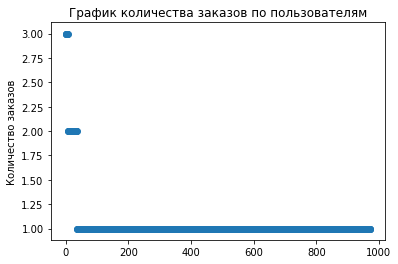

In [28]:
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']) 
plt.ylabel('Количество заказов')
plt.title('График количества заказов по пользователям')
plt.show()

Можно заключить, что в основном пользователи делали по 1 заказу.

**Посчитаем 95-й и 99-й перцентиль количества заказов на пользователя**

In [29]:
np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей совершали больше одного заказа, и не более 1% пользователей совершали более двух.

## 2.7 Анализ стоимостей заказов

Text(0.5, 1.0, 'График стоимостей заказов')

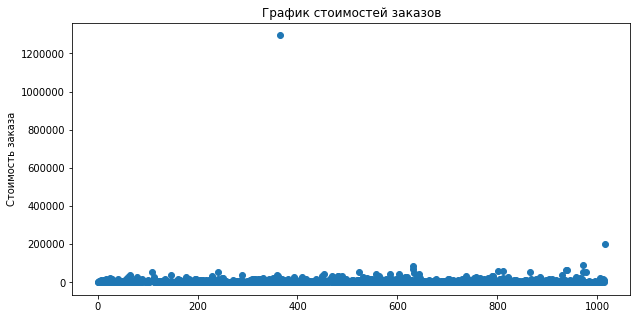

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))
fig= plt.figure(figsize=(10,5))
plt.scatter(x_values, orders['revenue']) 
plt.ylabel('Стоимость заказа')
plt.title('График стоимостей заказов')

Наблюдается аномально дорогой заказ с выручкой более 1200000, а также заказ со стоимостью около 200000. Большинство заказов  укладывается в сумму до 100000. 

**Посчитаем 95-й и 99-й перцентили стоимости заказов**

In [31]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% пользователей  делают заказы дороже 26785, и не более 1% - дороже 53904.

## 2.8 Статистическая значимость различий в конверсии между группами по «сырым» данным

Соберем куммулятивные данные в одну таблицу:

In [32]:
#количество пользователей в указанную дату в группе A
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

#количество пользователей до выбранной даты включительно в группе A
visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

#количество пользователей в указанную дату в группе В
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

#количество пользователей до выбранной даты включительно в группе В
visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

#количество заказов и их стоимость в указанную дату в группе A
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

#суммарное количество заказов до выбранной даты включительно в группе A
ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date','ordersCummulativeA','revenueCummulativeA']

#количество заказов и их стоимость в указанную дату в группе B
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

#суммарное количество заказов до выбранной даты включительно в группе B
ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date','ordersCummulativeB','revenueCummulativeB']

#объединим данные каждой группы в один датафрейм
data = (
    ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

data.head(5)

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,23,142779,17,59758,23,142779,17,59758,719,713,719,713
1,2019-08-02,19,91602,23,162043,42,234381,40,221801,619,581,1338,1294
2,2019-08-03,24,112473,14,67049,66,346854,54,288850,507,509,1845,1803
3,2019-08-04,11,41176,14,96890,77,388030,68,385740,717,770,2562,2573
4,2019-08-05,22,86383,21,89908,99,474413,89,475648,756,707,3318,3280


In [33]:
#количество заказов для пользователей совершивших хотя бы один заказ в группе A
ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['userId', 'orders']

#количество заказов для пользователей совершивших хотя бы один заказ в группе B
ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['userId', 'orders']

#число заказов определённого пользователя
#для пользователей группы A, которые ничего не заказали укажем нули
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

#число заказов определённого пользователя
#для пользователей группы B, которые ничего не заказали укажем нули
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Для определения статистической значимости различий в конверсии между группами по «сырым» данным сформулируем гипотезы:
<li>нулевая гипотеза: статистически значимых различий в конверсии между группами А и В нет</li>
<li>альтернативная гипотеза: статистически значимые различия в конверсии между группами А и В есть</li>
Уровень статистической значимости определим в 5%. Применим критерий Манна-Уитни.

In [34]:
#p-value
print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1], alternative='two-sided'))

#прирост конверсии группы В
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.00551
0.160


p-value значительно меньше 0,05, поэтому нулевую гипотезу отвергаем. Анализ сырых данных сообщает, что в конверсии между группами есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А составляет 16%.

## 2.9 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Найдём относительные различия в среднем чеке между группами.
Для определения статистической значимости различий в среднем чеке заказа между группами по «сырым» данным сформулируем гипотезы:
<li>нулевая гипотеза: статистически значимых различий в среднем чеке между группами А и В нет</li>
<li>альтернативная гипотеза: статистически значимые различия в среднем чеке между группами А и В есть</li>
Уровень статистической значимости определим в 5%. Применим критерий Манна-Уитни.

In [35]:
#p-value
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1], alternative='two-sided'))

#прирост среднего чека группы В
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.415
0.287


p-value значительно выше 0,05, то есть статистически значимых отличий в среднем чеке между группами нет. Таким образом, нет причин отвергать нулевую гипотезу.  Средний чек группы В выше среднего чека группы А на 28,7%

## 2.9 Статистическая значимость различий в конверсии между группами по «очищенным» данным

Подготовим "очищенные" данные. Как было расчитано ранее, 95-й и 99-й перцентили числа заказов на одного пользователя равны 1 и 2 заказам на пользователя. При этом 95-й и 99-й перцентили средних чеков равны 26785 и 53904.
Примем за аномальных пользователей тех, кто совершил 2 заказа и более, или совершил заказ на сумму свыше 30000. Таким образом, мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [36]:
#пользователи с количеством заказов больше 4
usersWithManyOrders = pd.concat([
        ordersByUsersA[ordersByUsersA['orders'] > 1]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['userId'],
], axis=0,)

#пользователи с заказами на сумму свыше 30000
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']

#общее количество аномальных пользователей
abnormalUsers = (pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0).drop_duplicates().sort_values())

print('Количество аномальных пользователей:', abnormalUsers.shape)
abnormalUsers.head()

Количество аномальных пользователей: (77,)


1099    148427295
928     204675465
33      249864742
684     358944393
36      366673373
dtype: int64

Выявлено 77 пользователй, у которых сумма заказа превышает 30000 и количество заказов больше 1. Уберем данные об аномальных заказах из групп А и В.

In [37]:
#очищенные данные группы А
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))]['orders'],
        pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])),name='orders',),
    ],
    axis=0,
)

#очищенные данные группы В
sampleBFiltered = pd.concat(
    [ordersByUsersB[np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))]['orders'],
     pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])),name='orders',),
    ],
    axis=0,
)

Посчитаем статистическую значимость различий в конверсии между группами А и В по очищенным данным. 

In [38]:
#p-value
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1], alternative='two-sided'))

#прирост конверсии группы В
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

0.00627
0.180


Можно заметить, что по сравнению с "сырыми" данными значения изменились незначительно. Анализ очищенных данных подтверждает, что в конверсии между группами А и В есть статистически значимые различия. Относительный прирост конверсии группы В к конверсии группы А по очищенным данным несколько вырос и составил 18%.

## 2.9 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [39]:
#p-value
print('{0:.3f}'.format(stats.mannwhitneyu(
    orders[np.logical_and(orders['group'] == 'A',
                                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1], alternative='two-sided'
    )
)


#прирост среднего чека группы В
print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.414
-0.011


Значение p-value практически не изменилось, что подтверждает анализ по "сырым" данным, что статистически значимых отличий в среднем чеке между группами нет. Однако, "очищенные" данные показали, что средний чек группы В ниже среднего чека группы А на 1,1%. Можно сделать вывод, что аномальные заказы сильно искажали результаты теста.

## 2.10 Выводы по результатам А/В теста

По результатм проведения А/В теста заключим следующее:
<li>в конверсии между группами А и В есть статистически значимые различия, как по сырым данным, так и по очищенным </li>
<li>в среднем чеке между группами А и В статистически значимых различий нет, при этом при этом средний чек группы В стал несущественно ниже среднего чека группы А, после удаления аномальных данных</li>
<li>судя по графику различия конверсий, конверсия группы B имеет тенденцию к стабильному приросту, в отличие от группы А</li>
<li>график различия среднего чека серьезно колеблется, что указало на возможные аномалии</li>
Тест можно остановить, определив группу В как выигрышную.